In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/education-statistics/edstats-excel-zip-72-mb-/EdStatsEXCEL.xlsx
/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsFootNote.csv
/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsSeries.csv
/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsData.csv
/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsCountry.csv
/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsCountry-Series.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from datetime import datetime
import os

In [3]:
Country = pd.read_csv("/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsCountry.csv")
CountrySeries = pd.read_csv("/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsCountry-Series.csv")
data = pd.read_csv("/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsData.csv")
FootNote = pd.read_csv("/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsFootNote.csv")
series = pd.read_csv("/kaggle/input/education-statistics/edstats-csv-zip-32-mb-/EdStatsSeries.csv")

## Analyse exploratoire

### EdStatsCountry.csv

In [4]:
Country.shape

(241, 32)

In [5]:
Country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [6]:
Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


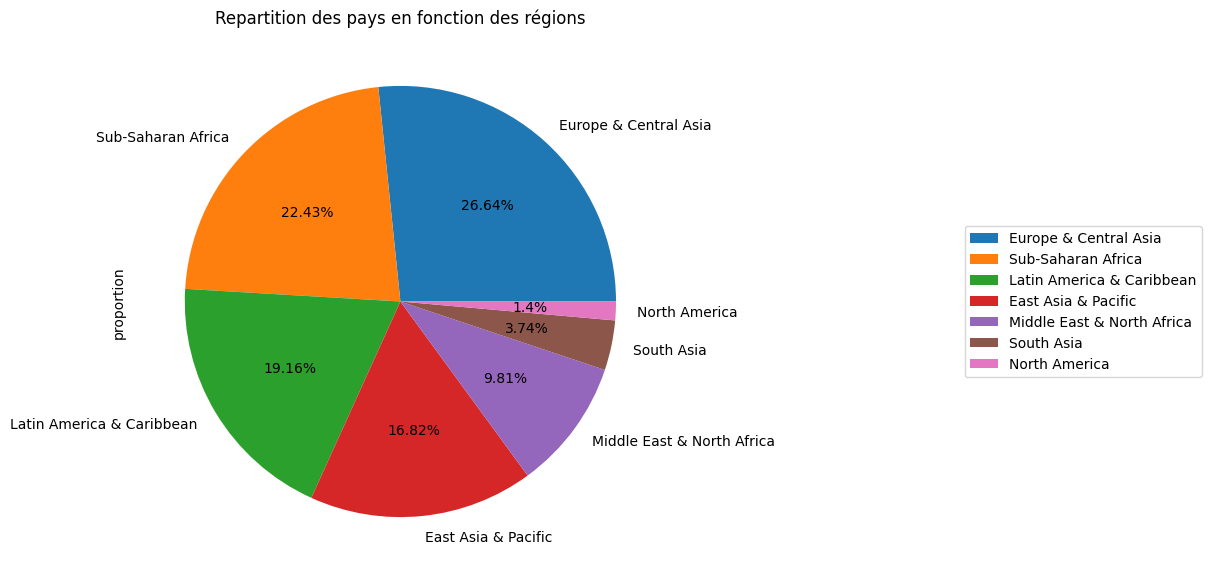

In [7]:
plt.figure(figsize = (7,7))
Country['Region'].value_counts(normalize=True).plot(kind="pie",
                                                   autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Repartition des pays en fonction des régions')
plt.legend(loc="right",bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

Les régions qui contiennent le plus de pays sont : **l'Afrique Sub Saharienne, l'Europe et l'Asie centrale anisi que l'Amérique latine et les Carraibes**

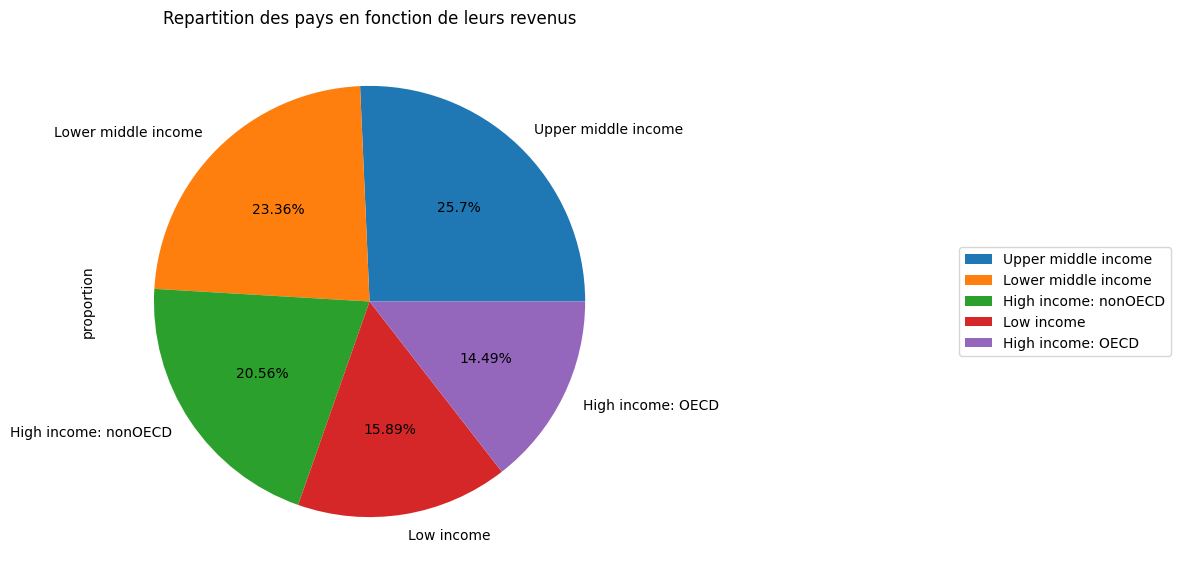

In [8]:
plt.figure(figsize = (7,7))
Country['Income Group'].value_counts(normalize=True).plot(kind="pie",
                                                   autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Repartition des pays en fonction de leurs revenus')
plt.legend(loc="right",bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

La répartition des pays dans chacun des groupes de revenus est plutôt **équilibré**

#### Organisation du fichier EdStatsCountry.csv :

EdStatsCountry est un jeu de donnée composé de 241 lignes et 32 colonnes.

Description :

Il décrit grâce à quelques indicateurs la situation économique des pays.Il y aussi des térritoires comme le Gibraltar ( territoire britannique d'outre-mer) ou des régions comme l'Amérique latine et CaraÏbes dont il n y a pas d'informations sur leur situation économique. Cette liste géographiques est divisée selon leur revenus (revenu moyen supérieur , revenu moyen inférieur, revenu élevé faisant partie de l'OECD (Organisation de coopérations et de développement Cumulative), revenu élevé ne faisant pas partie de l'OECD, revenu faible)

### EdStatsCountrySeries.csv

In [9]:
CountrySeries.shape

(613, 4)

In [10]:
CountrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [11]:
CountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [12]:
CountrySeries['CountryCode'].nunique()

211

211 pays pris en compte pour le jeu de données

#### Organisation du fichier EdStatsCountryseries.csv :

Il est composé de 613 lignes et 4 colonnes

Descritpion du fichier :

EdStatsCountryseries donne les sources sur les SeriesCode qui sont des diminutifs des différents indicateurs économiques d'un pays.

### EdStatsData.csv

In [13]:
data.shape

(886930, 70)

In [14]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [15]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data["Indicator Name"].nunique()

3665

In [17]:
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


#### Organisation du fichier:

EDstatsData est composé de 886930 lignes et 70 colonnes

Description du fichier:

Il comprend 70 colonnes dont les quatres premiers sont respectivement: Nom du pays ou régions, le code du pays, le nom de l'indicateur et le code de l'indicateur. Les 66 colonnes restantes correspondent au années de 1970 à 2100.

Ce fichier correspond à l'évolutions des différents indicateurs d'educations par pays par rapport aux temps (en année).

### EdFootnote.csv

In [18]:
FootNote.shape

(643638, 5)

In [19]:
FootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [20]:
FootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


#### Organisation du fichier EdFootnote.csv :

EdFootNote.csv est fichier composé de 643638 lignes et 5 colonnes 

Description du fichier :

Ce fichier indique les sources des différents indicateurs d'éducation des pays. Plusieurs indicateurs statistiques pour un même pays trouvé avec des sources différentes.

### EdStatSeries.csv


In [21]:
series.shape

(3665, 21)

EdstatSeries est un fichier de 3665 lignes et 21 colonnes 
Il présente les codes et les définitions des noms des indicateurs de niveaux d'instructions selon le niveau d'éducation.

### Valeurs manquantes

In [22]:
files = [Country, CountrySeries, data, FootNote, series]
miss_value_files = {file : round(data.isna().sum().sum()/data.size * 100,0) for file, data in zip(['Country', 'CountrySeries', 'data', 'FootNote', 'series'],files)}

In [23]:
miss_value_files

{'Country': 31.0,
 'CountrySeries': 25.0,
 'data': 86.0,
 'FootNote': 20.0,
 'series': 72.0}

In [24]:
miss_table = pd.DataFrame(data = miss_value_files, index=['% valeurs manquantes'])
miss_table

,Country,CountrySeries,data,FootNote,series
% valeurs manquantes,31.0,25.0,86.0,20.0,72.0


In [25]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Totale', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(tt)
pd.set_option('display.max_rows', None)

In [26]:
missing_data(data)

,Totale,Percent,Types
Country Name,0,0.000000,object
Country Code,0,0.000000,object
Indicator Name,0,0.000000,object
Indicator Code,0,0.000000,object
1970,814642,91.849639,float64
1971,851393,95.993258,float64
1972,851311,95.984012,float64
1973,851385,95.992356,float64
1974,851200,95.971497,float64
1975,799624,90.156382,float64


## Listes des indicateurs à prendre en compte (liste non exhaustive)

La fonction ci-dessous permet d'extaire un indicateur pour un niveau donné (Pays, Région ...) Elle permet également d'ajouter les colonnes region, Income group au dataset de sortie

In [27]:
def recup_indicateur(dataset, niveau,indicateur, Country, CountrySeries):
        #Liste des années de 1970 à 2100
        annees = list(map(str,range(1970,2100,1)))
        #Liste des pays présents dans le fichier CountrySeries et Country => 211 pays en tous
        PaysValide = Country.loc[Country["Country Code"].isin(CountrySeries['CountryCode'].unique().tolist()),'Short Name'].tolist()
        RegionValide = Country['Region'].dropna().unique().tolist()
        if niveau == 'Region':
            checklist = RegionValide
        else:
            checklist = PaysValide
        tab = dataset[dataset['Country Name'].isin(checklist)]
        ColonneAnnee = [yy for yy in annees if yy in dataset.columns]

        # On supprime toutes les lignes dont toutes la valeurs sont à NaN sur la base des colonnes de subset
        # On supprime les colonnes dont toutes la valeurs sont à NaN
        tab = tab.loc[tab['Indicator Name'] == indicateur].dropna(how = 'all', subset=ColonneAnnee).dropna(axis=1,how='all')
        #Rajout des colonnes utiles à l'analyse
        if (not tab.empty):
            tab = tab.drop(['Indicator Code'], axis=1)
            tab1 = Country[['Country Code', 'Region','Income Group']]
            newTab = tab1.merge(tab,on='Country Code')
        return newTab

## Exploration de donnée, Nettoyage pour chaque indicateur

### Indicateur du taux de scolarisation au lycée

In [28]:
#on extrait l'indicateur grâce à la fonction recup_indicteur
TauxScolarisationpParPays = recup_indicateur(data, 'Country Name','Gross enrolment ratio, lower secondary, both sexes (%)',  Country, CountrySeries)
# on supprime les valeurs NAN de la colonne 2015 pour afficher sa distribution

In [29]:
TauxScolarisationpParPays.shape

(176, 41)

In [30]:
TauxScolarisationpParPays.head()

,Country Code,Region,Income Group,Country Name,Indicator Name,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Gross enrolment ratio, lower secondary, both s...",NaN,NaN,NaN,NaN,NaN,...,107.912987,102.294456,112.289230,112.833168,113.184990,118.578140,NaN,NaN,NaN,NaN
1,AFG,South Asia,Low income,Afghanistan,"Gross enrolment ratio, lower secondary, both s...",NaN,NaN,NaN,NaN,NaN,...,41.281872,56.401390,64.569054,71.224403,67.239487,67.162498,65.856697,66.153214,67.447617,NaN
2,AGO,Sub-Saharan Africa,Upper middle income,Angola,"Gross enrolment ratio, lower secondary, both s...",NaN,NaN,NaN,NaN,NaN,...,NaN,28.146139,30.085800,36.217270,35.811230,NaN,NaN,NaN,NaN,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albania,"Gross enrolment ratio, lower secondary, both s...",NaN,NaN,NaN,NaN,NaN,...,96.063103,96.933022,95.236130,95.937202,94.660828,95.492981,98.235313,98.624130,101.488373,NaN
4,ARE,Middle East & North Africa,High income: nonOECD,United Arab Emirates,"Gross enrolment ratio, lower secondary, both s...",NaN,NaN,NaN,NaN,NaN,...,82.293060,NaN,77.060898,77.090431,79.804619,77.152512,80.369698,88.635422,92.388611,NaN


In [31]:
TauxScolarisationpParPays.isnull().sum().sum()/TauxScolarisationpParPays.size * 100

48.79434589800443

48% de valeurs manquantes, supprimons les valeurs manuqantes pour cet indicateur

In [32]:
DistTauxScol = TauxScolarisationpParPays['2015'].dropna()

In [33]:
# avec la librairie seaborn
def hist(data,label_x, label_y, title):
    plt.figure(figsize=(10,9))
    sns.set()
    sns.displot(data, kde = True)
    plt.xlabel(label_x)
    plt.ylabel(label_y, c='k')
    plt.title(title)
    plt.show()

In [34]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

#### Analyse univariée : histogramme et boîte à moustache

<Figure size 1000x900 with 0 Axes>

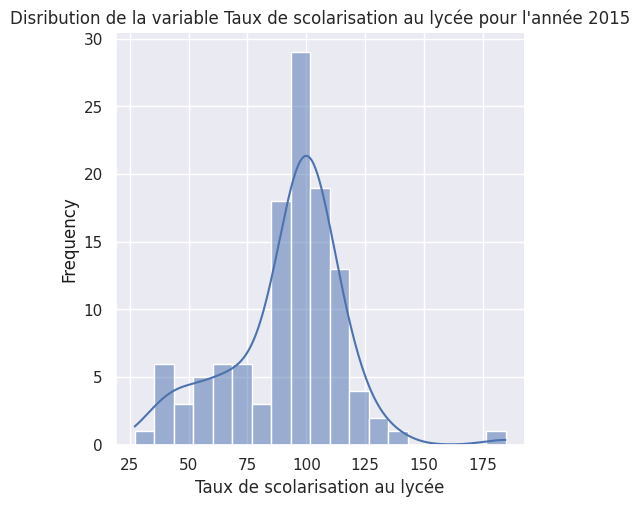

In [35]:
hist(DistTauxScol, 'Taux de scolarisation au lycée', 'Frequency', "Disribution de la variable Taux de scolarisation au lycée pour l'année 2015")

**Un histogramme indique la distribution d'une variable continue**
- On y voit la forme des valeurs pour une variable continue
- On peut vérifier la normalité d'un jeu de donnée
- On repère si il y a des valeurs extrêmes ou aberrantes

Ici, la moyenne est autour de 90-100 et la dispersion des données entre 25 et 150.
On repère aussi un Outlier a 175

In [36]:
# mesure d'asymétrie
skew(DistTauxScol, bias = False)

-0.32157494272021175

In [37]:
# mesure d'applatissement
kurtosis(DistTauxScol, bias = False)

1.5955157356192267

La distriubtion du taux de scolarisation au lycée présente une mesure d'asymétrie légèrement négative et une mesure d'applatissement largement supérieur à 0. 
La majorité des valeurs sont entre 80 et 120.

In [38]:
# On extrait uniquement les colonnes entre 2000 et 2016, données utiles et récentes et on supprime les Nan
BoxTauxScol = TauxScolarisationpParPays.loc[:,'2000':'2016'].dropna()

In [39]:
def boxplot(data, title):
    plt.figure(figsize=(10,7))
    sns.set()
    sns.boxplot(data = data)
    plt.title(title)
    plt.show()

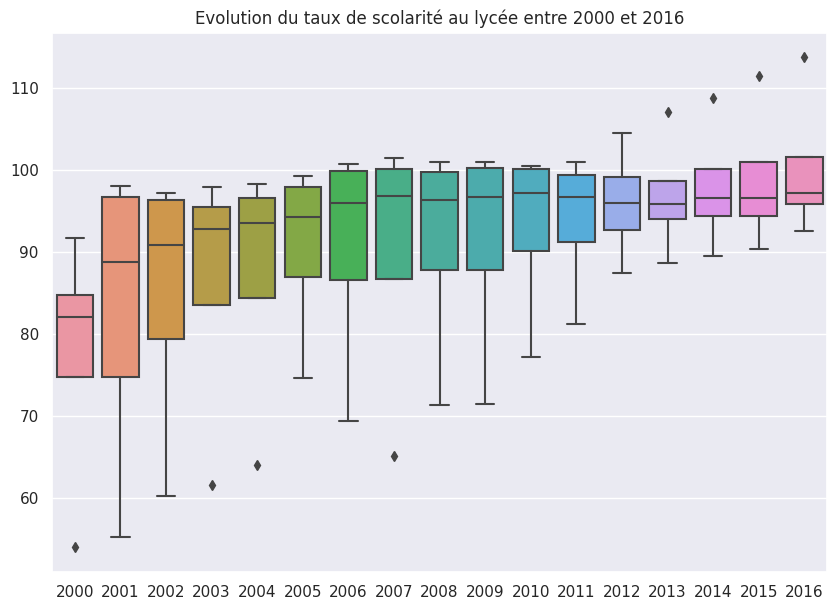

In [40]:
boxplot(BoxTauxScol,"Evolution du taux de scolarité au lycée entre 2000 et 2016")

On peux remarquer que le taux de scolarité a augmenté entre 2000 et 2003 avec de fortes disparités dans le monde puis s'est stabilisé à partir de 2003. On peut ajouter que les dipsarités entre pays diminuent à partir de 2011.
On remarque aussi quelques valeurs outliers :
- en 2000, 2003, 2004, 2007 : des pays pour lesquels le taux de scolarité est extrèmement faible
- en 2013, 2014, 2015, 2016 : des pays pour lesquels le taux de scolarité est extrèmement élevée. 

In [41]:
TauxScolarisationpParPays[['Region','Country Name','2016']].max()

Region          Sub-Saharan Africa
Country Name              Zimbabwe
2016                    115.956421
dtype: object

Cette valeur est par exemple à vérifier ... Zimbabwe est un pays dont le taux de scorlarisation est le plus faible . 

In [42]:
# préliminaire afin d'afficher le taux de scolarisation en fonction des revenues des pays
def group_taux_scol(TauxScolarisationpParPays):
    # on range les dates dans une liste de 1990 à 2016
    Col_AgrG = list(map(str,range(1990,2016,1)))
    # on ajoute a cette liste Income Group
    Col_AgrG.append('Income Group')
    # la moyenne du taux de scolarité de tous les pays selon les revenus par année
    TauxScolIncomeGroup = TauxScolarisationpParPays[Col_AgrG].groupby(['Income Group']).mean()
    # on place Income group au début du dataframe
    TauxScolIncomeGroup.reset_index(level=0, inplace=True)
    return TauxScolIncomeGroup

In [43]:
TauxScolIncomeGroup = group_taux_scol(TauxScolarisationpParPays)

In [44]:
def fig_evol_TauxScol_grRevenue(TauxScolIncomeGroup):
    fig = plt.figure(figsize=(10, 7))
    fig.suptitle("Evolution du Taux de scolarisation par groupe de revenu", fontsize  = 14)
    # on convertit les dates en datetime
    Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
    Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
    # on stocke les dates dans une liste nommée années_ref
    annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='YE')
    # on parcours la liste des Income group de 1990 à 2015 et on trace l'évolution du taux de scolarité
    for IG in TauxScolIncomeGroup['Income Group'].to_list():
        Scol = TauxScolIncomeGroup[TauxScolIncomeGroup['Income Group']==IG].loc[:,'2000':'2015'].values
        plt.plot(annees_ref,Scol.T,linewidth = 3.0, label=IG)

    #plt.ylim(0,100)

    plt.xlabel('Année')
    plt.ylabel('Evolution du Taux de scolarisation')

    leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
    leg.get_frame().set_alpha(0.5)
    plt.show()

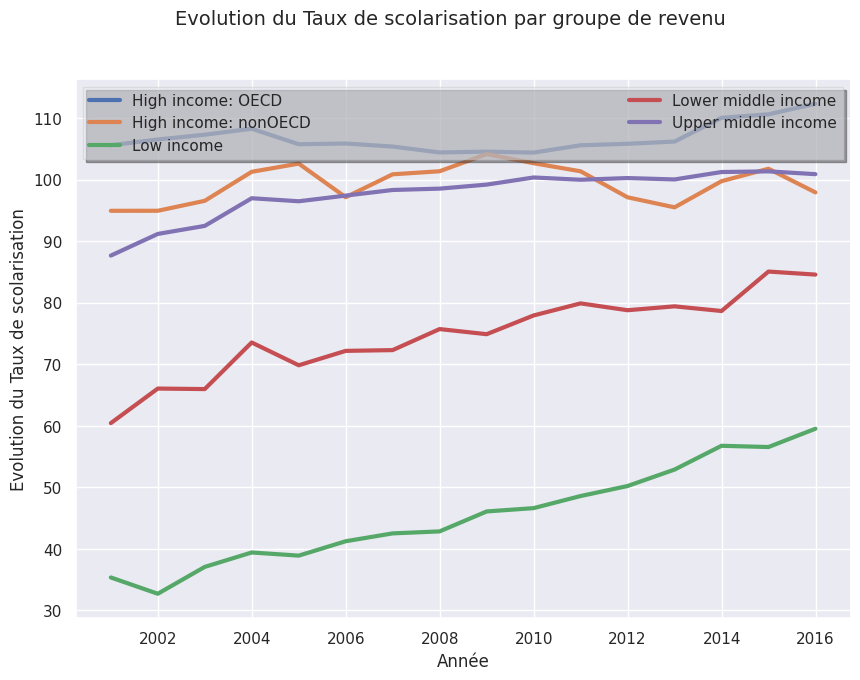

In [45]:
fig_evol_TauxScol_grRevenue(TauxScolIncomeGroup)

### Indicateur PIB

In [46]:
GPD = recup_indicateur(data,'country','GDP at market prices (current US$)', Country, CountrySeries)
GDPhist = GPD["2011"].dropna()


<Figure size 900x1000 with 0 Axes>

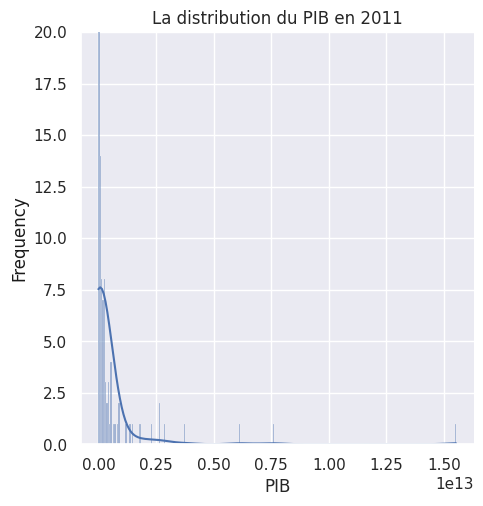

In [47]:
sns.set()
plt.figure(figsize = (9,10))
sns.displot(GDPhist, kde= True)
plt.title("La distribution du PIB en 2011")
plt.ylim(0,20)
plt.xlabel('PIB')
plt.ylabel('Frequency', c='k')
plt.show()

In [48]:
skew(GDPhist)

7.862274040524041

In [49]:
kurtosis(GDPhist)

73.2118022783331

- La distribution est presque complètement verticale au vu du nombre élevé de la mesure d'applatissement. La distribution possède une queue trés a droite avec une mesure d'asymétrie tres positive.
- Les valeurs fréquentes sont à gauche et quelques valeurs trés élevées sont à droite


In [50]:
GDPtris = GPD[['Region', 'Country Name', '2011']]
GDPtri = GDPtris.sort_values(by = "2011", ascending = False)
PaysPrem = GDPtri.head(10)
PaysPrem

,Region,Country Name,2011
181,North America,United States,1.551793e+13
34,East Asia & Pacific,China,7.572554e+12
86,East Asia & Pacific,Japan,6.157460e+12
44,Europe & Central Asia,Germany,3.757698e+12
57,Europe & Central Asia,France,2.862680e+12
59,Europe & Central Asia,United Kingdom,2.619700e+12
25,Latin America & Caribbean,Brazil,2.616202e+12
83,Europe & Central Asia,Italy,2.276292e+12
78,South Asia,India,1.823050e+12
30,North America,Canada,1.788648e+12


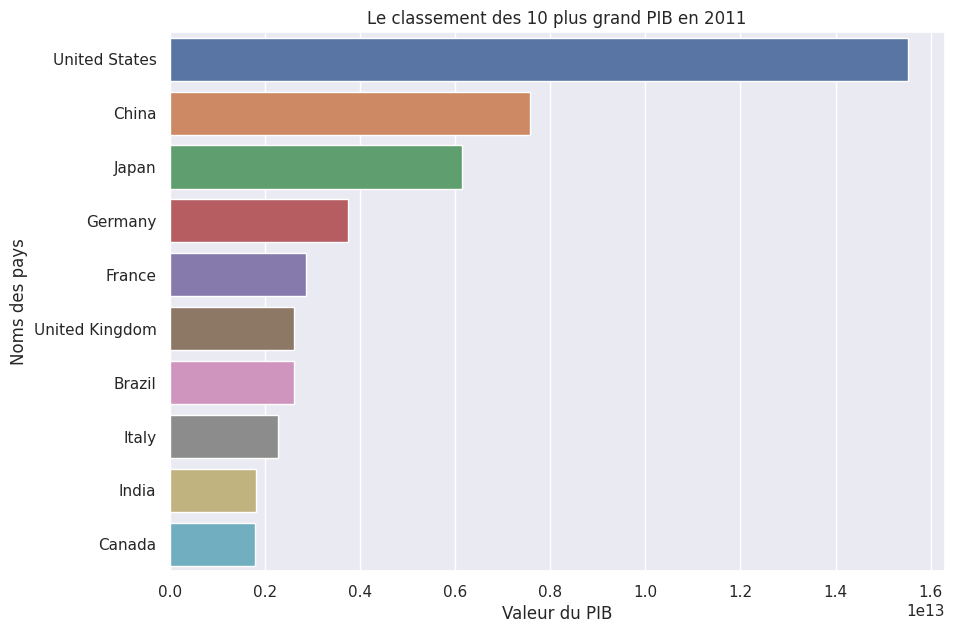

In [51]:
def barplot(data, x, y, label_x, label_y, title):
    plt.figure(figsize = (10,7))
    sns.barplot(data = data, x=x, y =y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()
    
barplot(PaysPrem, "2011", "Country Name","Valeur du PIB","Noms des pays","Le classement des 10 plus grand PIB en 2011")

- Le produit intérieur brut (PIB) est l’indicateur économique qui permet de quantifier la valeur totale de la « production de richesse » annuelle effectuée par les agents économiques (ménages, entreprises, administrations publiques) résidant à l’intérieur d’un territoire.
- On remarque que les pays présentant un PIB élévée sont : Les Etats Unis, la Chine, Le Japon, l'Allemagne et la France suivi de le royaume unis.

In [52]:
donneesnum = GPD.drop(['Country Code','Region','Country Name','Indicator Name','Income Group'],axis=1)

In [53]:
donneesnum.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
4,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [54]:
GPD['MEAN'] = donneesnum.mean(axis=1)
GPD['MEDIAN'] = donneesnum.median(axis=1)
GPD['STD'] = donneesnum.std(axis=1)
GPD['VARIANCE'] = donneesnum.var(axis=1)
GPD['CHANGE'] = 100.0 * ((donneesnum['2015'] - donneesnum['2000'])/donneesnum['2000'])

GPD['SKEWNESS'] = donneesnum.skew(axis=1)
GPD['KURTOSIS'] = donneesnum.kurtosis(axis=1)

In [55]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
GPD[colIdx].head()

,Country Code,Region,Country Name,MEAN,MEDIAN,STD,VARIANCE,CHANGE
0,ABW,Latin America & Caribbean,Aruba,2.036355e+09,1.981198e+09,4.771258e+08,2.276490e+17,NaN
1,AFG,South Asia,Afghanistan,8.091312e+09,4.356232e+09,6.996116e+09,4.894564e+19,NaN
2,AGO,Sub-Saharan Africa,Angola,3.791410e+10,1.107267e+10,4.289402e+10,1.839897e+21,1027.785485
3,ALB,Europe & Central Asia,Albania,6.011364e+09,3.632044e+09,4.555170e+09,2.074957e+19,212.090527
4,AND,Europe & Central Asia,Andorra,1.468489e+09,1.106929e+09,1.289176e+09,1.661975e+18,96.000501


In [56]:
GPDByRegion = GPD[colIdx].groupby(['Region']).mean(numeric_only=True)
GPDByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,CHANGE
Region,,,,,
East Asia & Pacific,2.147461e+11,1.719514e+11,2.068724e+11,4.593313e+23,313.889002
Europe & Central Asia,1.885297e+11,1.726745e+11,1.273888e+11,7.893266e+22,249.078043
Latin America & Caribbean,5.894702e+10,4.023091e+10,5.296314e+10,2.294819e+22,180.336128
Middle East & North Africa,5.042160e+10,3.204796e+10,4.567760e+10,4.979796e+21,245.687368
North America,2.931710e+12,2.491435e+12,1.993208e+12,9.934638e+24,92.690083


In [57]:
def bar_pie(data,database, ylabel, title):
    width = 0.2
    x = np.arange(len(data.index))
    #dpi résolution de l'image
    fig = plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')

    ax1 = plt.subplot(1,2, 1)

    bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
    bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
    bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

    ax1.set_ylabel(ylabel,fontsize=20)
    ax1.set_title(title,fontsize=20)
    ax1.set_xticks(x)
    ax1.set_xticklabels(data.index,rotation=90,fontsize=20)
    ax1.legend()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%".format(pct, absolute)

    colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

    ax2 = plt.subplot(1,2, 2)

    wedges, texts, autotexts = ax2.pie(database['Region'].value_counts(),
                                       autopct=lambda pct: func(pct, database['Region'].value_counts())
                                       ,colors=colors,textprops=dict(color="w"))

    ax2.legend(wedges, database['Region'].value_counts().index,
              loc="center",
              fontsize = 20,
              bbox_to_anchor=(0.25, -0.7, 0.5, 1))
    ax2.set_title('Nombre de pays par région', fontsize = 20)

    plt.setp(autotexts, size=15, weight="bold")

    plt.show()


In [58]:
data_GPD = GPDByRegion[['MEAN','MEDIAN','STD']]

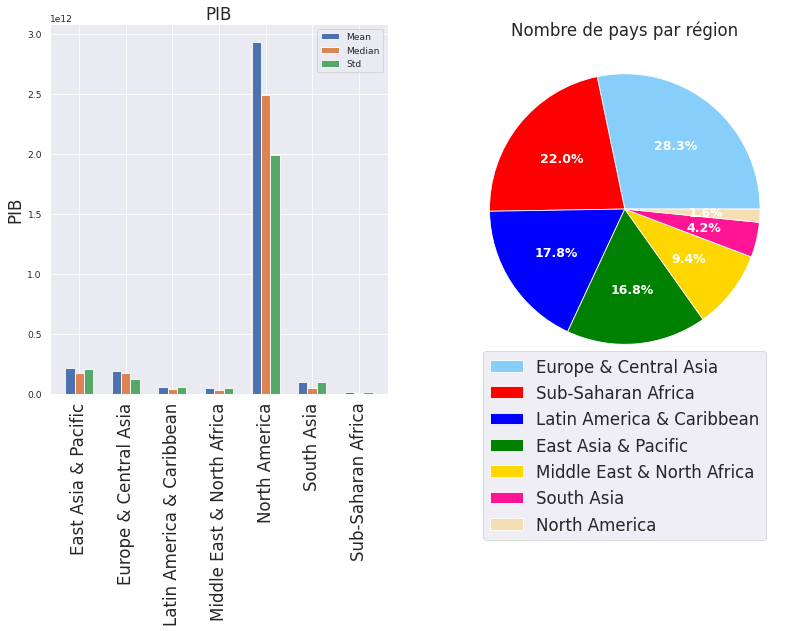

In [59]:
bar_pie(data_GPD,GPD, 'PIB', 'PIB')

### Indicateur Accées à internet (100 personnes)

In [60]:
Accenet = recup_indicateur(data, 'country', 'Internet users (per 100 people)', Country, CountrySeries)

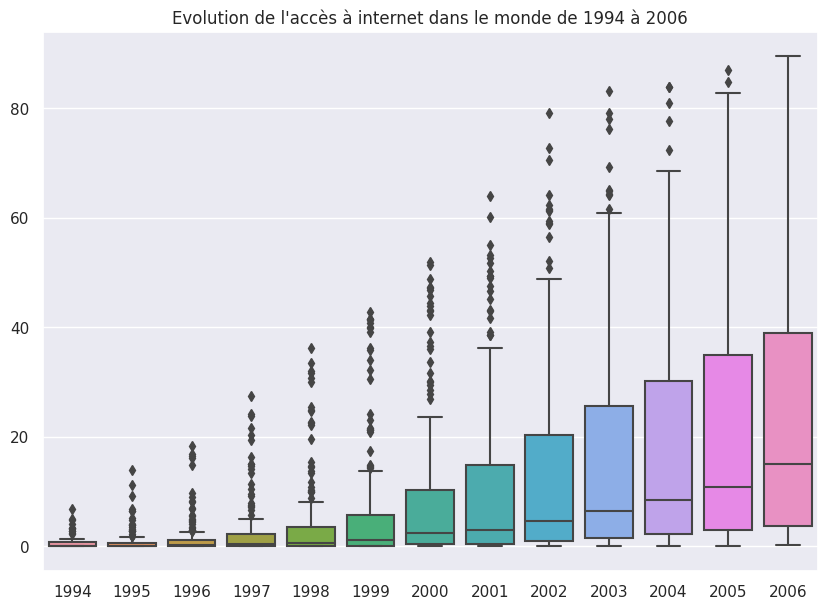

In [61]:
data_utile = Accenet.loc[:,'1994':'2006']
boxplot(data_utile, "Evolution de l'accès à internet dans le monde de 1994 à 2006")

In [62]:
Acc = Accenet[["Region","Country Name", "2015"]]
Acc.sort_values(by = "2015", ascending = False).head(10)

,Region,Country Name,2015
23,North America,Bermuda,98.323610
80,Europe & Central Asia,Iceland,98.200000
102,Europe & Central Asia,Luxembourg,97.334100
4,Europe & Central Asia,Andorra,96.910000
129,Europe & Central Asia,Norway,96.810300
98,Europe & Central Asia,Liechtenstein,96.641195
46,Europe & Central Asia,Denmark,96.330500
19,Middle East & North Africa,Bahrain,93.478301
106,Europe & Central Asia,Monaco,93.363302
145,Middle East & North Africa,Qatar,92.884826


L'accées à internet s'est mondialisé au fil des années surtout dans l'Europe et l'asie centrale ou on peut retrouver: Le bermuda, l'irlanden le luxembourg, la norvège, Danemark Monac

## Indicateur Ordinateurs par personnes ( 100 personnes)

In [63]:
PopulationOrdinateur = recup_indicateur(data, 'country', 'Personal computers (per 100 people)', Country, CountrySeries)

<Figure size 1000x900 with 0 Axes>

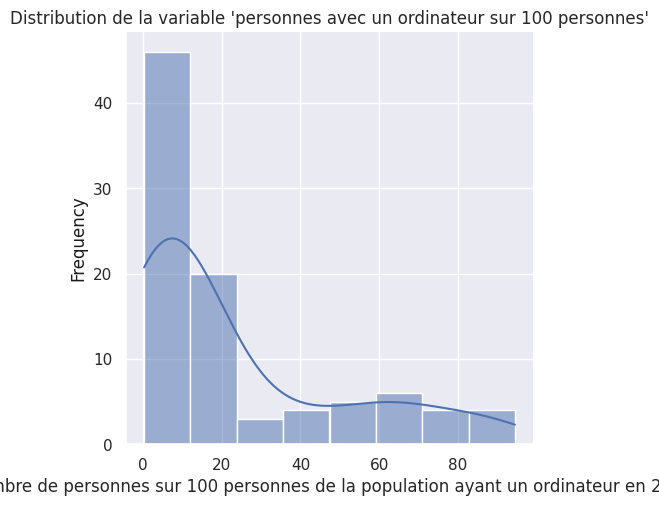

In [64]:
PO = PopulationOrdinateur["2006"].dropna()
hist(PO,'Nombre de personnes sur 100 personnes de la population ayant un ordinateur en 2006','Frequency',"Distribution de la variable 'personnes avec un ordinateur sur 100 personnes'")

In [65]:
skew(PO, bias = False)

1.2826792727182499

In [66]:
kurtosis(PO, bias = False)

0.3810636968443828

La distribution ci-dessus présente une queue à doite avec une mesure d'asymétrie positive et un coefficient d'applatissement positif.

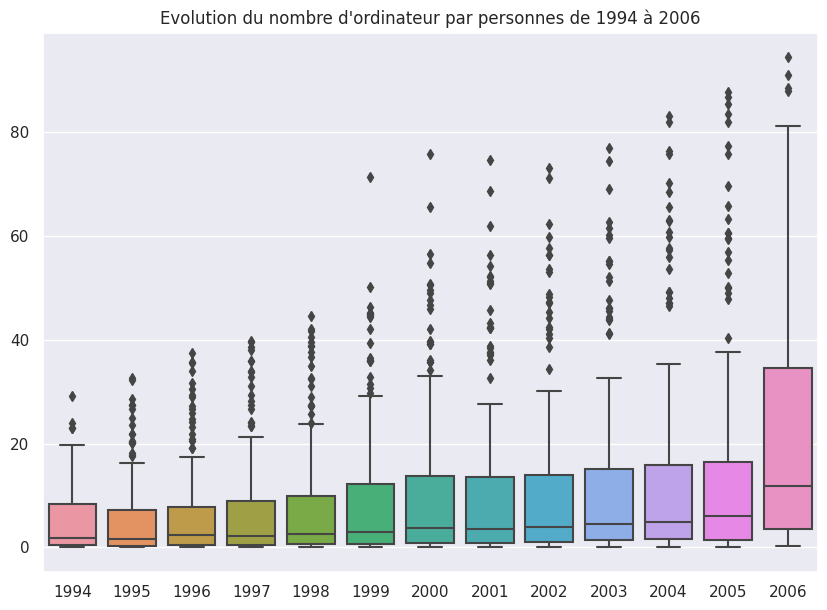

In [67]:
data_utile = PopulationOrdinateur.loc[:,'1994':'2006']
boxplot(data_utile, "Evolution du nombre d'ordinateur par personnes de 1994 à 2006")

On remarque une augmentation importante du nombre de populations possédant un ordinateur au fil des années avec des disparités qui augmente aussi avec le temp

In [68]:
TriPopOrdi = PopulationOrdinateur[["Region", "Country Name", "2006"]]
TriPopOrdi = TriPopOrdi.sort_values(by = "2006", ascending = False)
TriPopOrdi.head(10)

,Region,Country Name,2006
28,North America,Canada,94.446705
118,Europe & Central Asia,Netherlands,90.987849
29,Europe & Central Asia,Switzerland,88.610693
149,Europe & Central Asia,Sweden,88.011928
143,Europe & Central Asia,San Marino,81.148357
55,Europe & Central Asia,United Kingdom,80.170361
167,North America,United States,79.915488
43,Europe & Central Asia,Denmark,72.818527
140,East Asia & Pacific,Singapore,68.916046
95,Europe & Central Asia,Luxembourg,68.209751


On remarque que les pays dont la population sont probablement le mieux fournis en ordinateur personnels sont le canada, la norvège, la suisse, San Marino, Le Royaume Unis, les Etats Unis. Beaucoup de pays dans l'amérique du nord et l'Europe et Asie Centrale. Viens ensuite Singapore,Chine et la France

## Indicateur nombre d'élèves inscrit au lycée

In [69]:
EtudInscritLycee = recup_indicateur(data,'country','Enrolment in upper secondary education, both sexes (number)',Country, CountrySeries)
ETL = EtudInscritLycee[["Region", "Country Name", "2007"]].dropna()

## Indicateur du nombre d'élèves inscrit dans le domaine tertiaire

In [70]:
EtudInscritTer = recup_indicateur(data,'country','Enrolment in tertiary education, all programmes, both sexes (number)',Country, CountrySeries)
ETT = EtudInscritTer[["Region", "Country Name", "2007"]].dropna()  

## Somme des deux indicateurs précédants pour avoir le nombre total de jeune par pays

In [71]:
# je donne des noms de colonne "2007" différents selon les données de nombre de jeune inscrits au lycée ou dans le domaine tertiaire
ETL.rename(columns={'2007': 'Lycee 2007'}, inplace=True)
ETT.rename(columns={'2007': 'Terti 2007'}, inplace=True)

In [72]:
# je fusionne les deux colonnes dans un même dataframe et j'ajoute une colonne qui fait la somme de ces deux colonnes
# pour avoir la population jeune totale
NTJ = ETL.merge(ETT)
NTJ["somme"] = NTJ["Lycee 2007"] + NTJ["Terti 2007"]
NTJ.head(10)

,Region,Country Name,Lycee 2007,Terti 2007,somme
0,Latin America & Caribbean,Aruba,4430.0,2232.0,6662.0
1,Europe & Central Asia,Albania,173269.0,86863.0,260132.0
2,Middle East & North Africa,United Arab Emirates,116515.0,80296.0,196811.0
3,Latin America & Caribbean,Argentina,1451352.0,2208291.0,3659643.0
4,Europe & Central Asia,Armenia,110950.0,135725.0,246675.0
5,East Asia & Pacific,Australia,912054.0,1083715.0,1995769.0
6,Europe & Central Asia,Austria,389567.0,260975.0,650542.0
7,Europe & Central Asia,Azerbaijan,408117.0,181937.0,590054.0
8,Sub-Saharan Africa,Burundi,45364.0,19296.0,64660.0
9,Europe & Central Asia,Belgium,546147.0,393687.0,939834.0


In [73]:
# je trie les pays ayant le nombre de population jeune de manière décroissante
NTJ.sort_values(by = "somme", ascending = False).head(10)

,Region,Country Name,Lycee 2007,Terti 2007,somme
22,East Asia & Pacific,China,42175612.0,25346280.0,67521892.0
47,South Asia,India,40184940.0,14862962.0,55047902.0
104,North America,United States,11729600.0,17758870.0,29488470.0
16,Latin America & Caribbean,Brazil,9073330.0,5272877.0,14346207.0
46,East Asia & Pacific,Indonesia,7213542.0,3806629.0,11020171.0
53,East Asia & Pacific,Japan,3794132.0,4032625.0,7826757.0
66,Latin America & Caribbean,Mexico,3742943.0,2528664.0,6271607.0
101,Europe & Central Asia,Turkey,3032821.0,2453664.0,5486485.0
37,Europe & Central Asia,United Kingdom,3082700.0,2362815.0,5445515.0
11,South Asia,Bangladesh,4144708.0,1145401.0,5290109.0


## Indicateur population totale entre 15-24 ans

In [74]:
indicateur = 'Population, ages 15-24, total'
pop1524TotalByCountry = recup_indicateur(data,'country',indicateur, Country, CountrySeries) 

In [75]:
# on supprime les lignes présentant des valeurs manquantes
pop1524TotalByCountry = pop1524TotalByCountry.dropna(how='any')
TJA = pop1524TotalByCountry["2014"].dropna()
pop1524TotalByCountry.sample(3)

,Country Code,Region,Income Group,Country Name,Indicator Name,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
130,PNG,East Asia & Pacific,Lower middle income,Papua New Guinea,"Population, ages 15-24, total",887257.0,904471.0,920498.0,935614.0,950198.0,...,1205597.0,1236043.0,1267759.0,1301552.0,1337863.0,1376663.0,1417283.0,1458712.0,1499599.0,1538799.0
107,MLI,Sub-Saharan Africa,Low income,Mali,"Population, ages 15-24, total",1515224.0,1561914.0,1609543.0,1657919.0,1706871.0,...,2437297.0,2512051.0,2588871.0,2669019.0,2753309.0,2842337.0,2935584.0,3031421.0,3127571.0,3222526.0
164,UGA,Sub-Saharan Africa,Low income,Uganda,"Population, ages 15-24, total",3432454.0,3558841.0,3686118.0,3815388.0,3948361.0,...,6092635.0,6320523.0,6553151.0,6788586.0,7025521.0,7263720.0,7503803.0,7746494.0,7992920.0,8244246.0


<Figure size 1000x900 with 0 Axes>

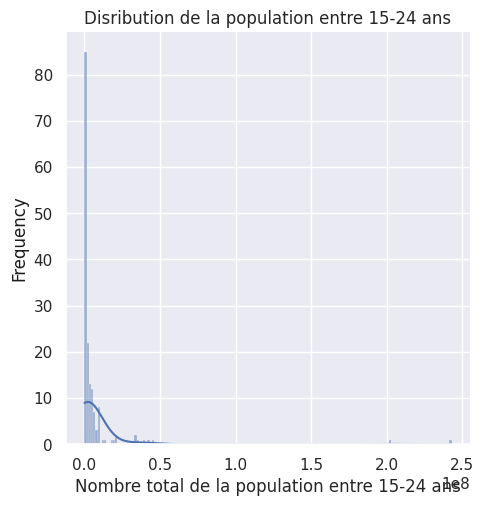

In [76]:
hist(TJA,'Nombre total de la population entre 15-24 ans', 'Frequency', "Disribution de la population entre 15-24 ans")

In [77]:
skew(TJA, bias = False)

7.927243702905218

In [78]:
kurtosis(TJA, bias = False)

67.3904425786513

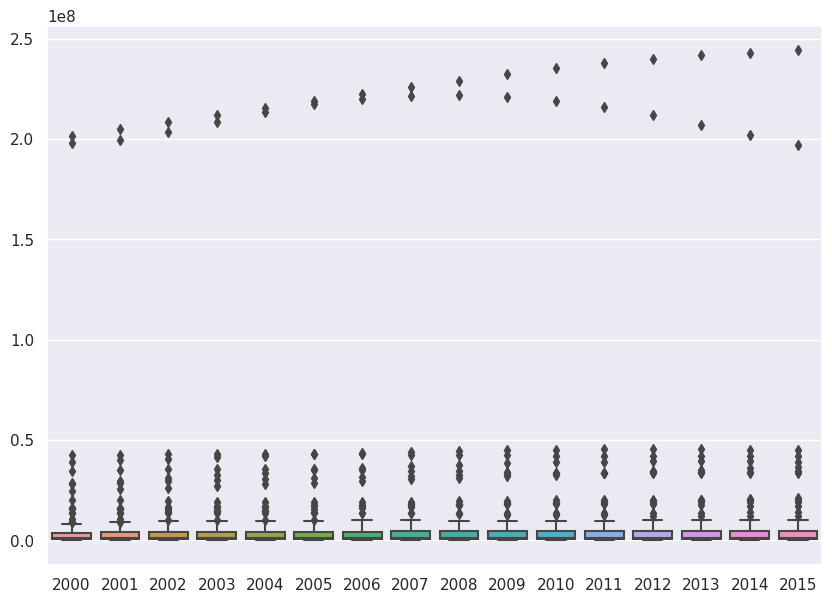

In [79]:
BoxPopJeune = pop1524TotalByCountry.loc[:,'2000':'2015'].dropna()
boxplot(BoxPopJeune, "")

La figure ci-dessus présente deux points qui représente deux pays dont le nombre total de jeune entre 15 et 24 ans et largement supérieur à ceux des autres pays. Ce sont deux points trés atypiques.

In [80]:
TriPopJeune = pop1524TotalByCountry[["Region", "Country Name","2015"]]
TriPopJeune = TriPopJeune.sort_values(by = "2015", ascending = False)
TriPopJeune.head(10)

,Region,Country Name,2015
73,South Asia,India,244120201.0
32,East Asia & Pacific,China,197026759.0
167,North America,United States,45147517.0
72,East Asia & Pacific,Indonesia,41819264.0
125,South Asia,Pakistan,39080811.0
118,Sub-Saharan Africa,Nigeria,36659023.0
16,South Asia,Bangladesh,34400594.0
24,Latin America & Caribbean,Brazil,33595574.0
52,Sub-Saharan Africa,Ethiopia,21074230.0
105,Latin America & Caribbean,Mexico,20336734.0


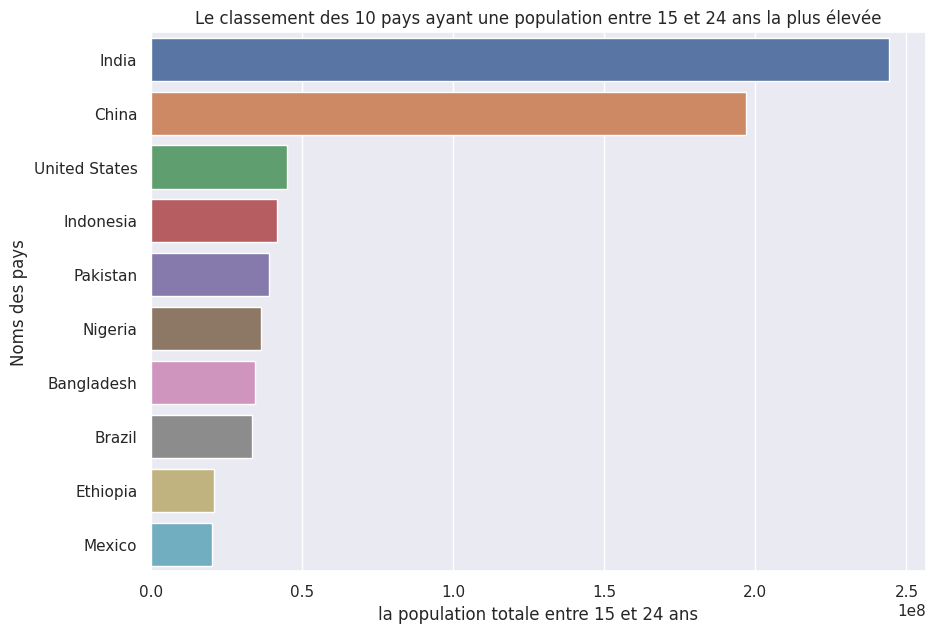

In [81]:
PaysPrem = TriPopJeune.head(10)
barplot(PaysPrem, "2015", "Country Name", "la population totale entre 15 et 24 ans", "Noms des pays","Le classement des 10 pays ayant une population entre 15 et 24 ans la plus élevée")

L'Inde et la Chine se démarque des autres pays avec le nombre le plus élvée de jeune entre 15 et 24 ans. Les pays présentant une population jeune entre 15 et 24 ans sont : Inde, la Chine, les Etats-Unis, l'Indonésie

# Construction d'une métrique de priorisation des pays et conclusion

In [82]:
def metrique(GDPtri,TriPopJeune,TriPopOrdi ,Acc,NTJ):
    #Je renomme les colonnes
    GDPtri.rename(columns={'2011': 'PIB'}, inplace=True)
    TriPopJeune.rename(columns={'2015': 'Population jeune'}, inplace=True)
    TriPopOrdi.rename(columns={'2006': 'Ordinateur personnel(100 personnes)'}, inplace=True)
    Acc.rename(columns={"2015": "Accès à internet(100 personnes)"}, inplace=True)
    NTJ.rename(columns = { "Lycee 2007":"Inscrit Lycée" , "Terti 2007":"Inscrit dans le tertiaire"}, inplace=True)
    #je fusionne les datframes entre eux pour en faire un tableau
    df1 = GDPtri.merge(TriPopJeune[["Country Name", "Population jeune"]], on = "Country Name", how = "outer")
    df2 = df1.merge(TriPopOrdi[["Country Name", "Ordinateur personnel(100 personnes)"]],on = "Country Name",how = "outer")
    df3 = df2.merge(Acc[["Country Name", "Accès à internet(100 personnes)"]],on = "Country Name",how = "outer")
    df4 = df3.merge(NTJ[["Country Name", "Inscrit Lycée","Inscrit dans le tertiaire"]], on = "Country Name" ,how = "outer")
    return df1, df2, df3, df4

In [83]:
df1, df2, df3, df4 = metrique(GDPtri,TriPopJeune,TriPopOrdi ,Acc,NTJ)

/tmp/ipykernel_18/3192110390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acc.rename(columns={"2015": "Accès à internet(100 personnes)"}, inplace=True)


In [84]:
df4['Rang_Pib'] = df3['PIB'].rank(na_option='bottom', ascending=False)
df4['Rang_Jeune'] = df3['Population jeune'].rank(na_option='bottom', ascending=False)
df4['Rang_Ordi'] = df3['Ordinateur personnel(100 personnes)'].rank(na_option='bottom', ascending=False)
df4['Rang_internet'] = df3['Accès à internet(100 personnes)'].rank(na_option='bottom', ascending=False)
df4['Rang_Lycee_inscrit'] = df4['Inscrit Lycée'].rank(na_option='bottom', ascending=False)
df4['Rang_Tertiaire_inscrit'] = df4['Inscrit dans le tertiaire'].rank(na_option='bottom', ascending=False)
df4["Rang_Total"] = df4['Rang_Pib'] + df4['Rang_Jeune']  + df4['Rang_Ordi'] + df4['Rang_internet'] + df4['Rang_Lycee_inscrit'] + df4['Rang_Tertiaire_inscrit']
df4["Métrique"] = 1-(df4["Rang_Total"]/max(df4["Rang_Total"]))
df4.head(5)

,Region,Country Name,PIB,Population jeune,Ordinateur personnel(100 personnes),Accès à internet(100 personnes),Inscrit Lycée,Inscrit dans le tertiaire,Rang_Pib,Rang_Jeune,Rang_Ordi,Rang_internet,Rang_Lycee_inscrit,Rang_Tertiaire_inscrit,Rang_Total,Métrique
0,South Asia,Afghanistan,1.793024e+10,7252785.0,0.390148,8.260000,NaN,NaN,105.0,27.0,90.0,170.0,150.0,150.0,692.0,0.308346
1,Europe & Central Asia,Albania,1.289087e+10,556269.0,3.774092,63.252933,173269.0,86863.0,114.0,118.0,67.0,72.0,64.0,76.0,511.0,0.489255
2,Middle East & North Africa,Algeria,2.000191e+11,6467818.0,NaN,38.200000,1040181.0,901562.0,43.0,30.0,143.0,114.0,22.0,22.0,374.0,0.626187
3,East Asia & Pacific,American Samoa,5.740000e+08,NaN,NaN,NaN,NaN,NaN,179.0,179.0,143.0,189.0,150.0,150.0,990.0,0.010495
4,Europe & Central Asia,Andorra,3.442063e+09,NaN,NaN,96.910000,NaN,NaN,150.0,179.0,143.0,4.0,150.0,150.0,776.0,0.224388


In [85]:
df4 = df4.sort_values(by = "Rang_Total", ascending = True)

Text(0.5, 1.0, "Les 10 premiers pays à prioriser pour l'implantation d'academy")

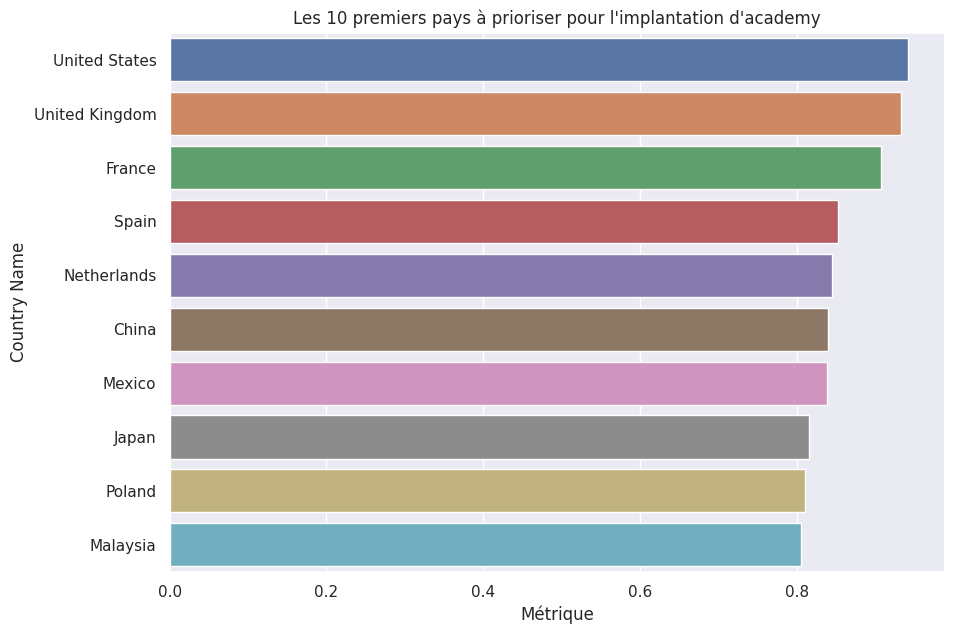

In [86]:
plt.figure(figsize = (10,7))
sns.set()
sns.barplot(data = df4.head(10), x = "Métrique", y = "Country Name")
plt.title("Les 10 premiers pays à prioriser pour l'implantation d'academy")